In [6]:
# from sklearn.datasets import load_boston
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [7]:
X, y = datasets.fetch_openml('boston', return_X_y=True)

/Users/lee/opt/anaconda3/envs/DL/lib/python3.8/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/lee/opt/anaconda3/envs/DL/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


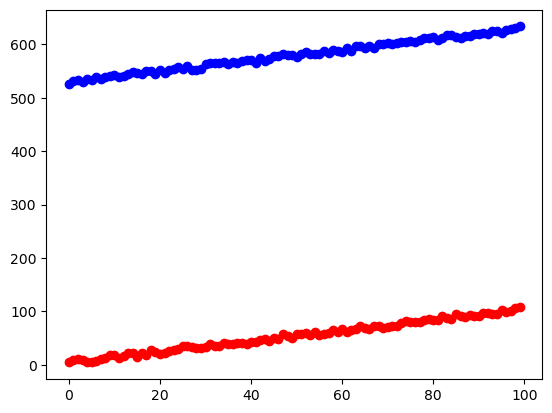

In [8]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10) # 데이터 개수 : 100, 25 bias, 10 분산해서 데이터 생성

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [9]:
x.shape # 100 x 3 데이터 생성

(100, 3)

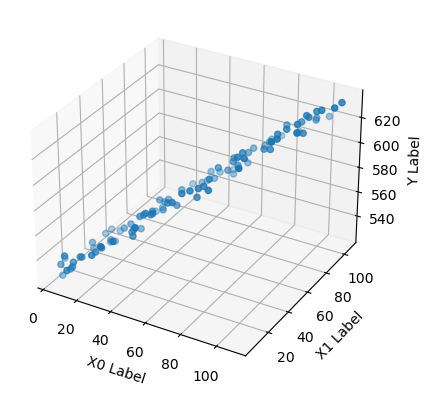

In [10]:
from mpl_toolkits.mplot3d import Axes3D
# 대략적인 형태

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

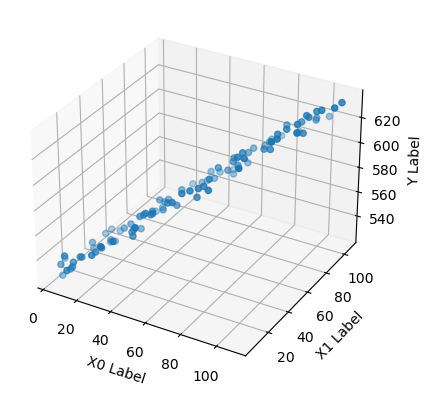

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# 대략적인 형태

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [12]:
def compute_cost(x, y, theta):
# cost를 구하는 함수
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
  # gradient 함수
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(theta) # = W^T X = XW 함수
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum() # 모든 가중치들에 대해 cost 편미분 식으로 업데이트
            # 만약 for문을 두 개로 나누지 않고 합쳐버린다면, 중간에 업데이트된 가중치들이 반영되어 업데이트가 이루어질 수 있으므로, for문을 분류하여 업데이트
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [13]:
theta_initial = np.ones(3) # 초기값을 달리해도 값에 영향을 준다

theta, cost_history, theta_history = minimize_gradient(
        x, y,theta_initial, 300000, 0.0001)
# learning rate : 30,0000 alpha : 0.0001
print("theta", theta)

theta [6.43379540e-01 3.71753454e-01 5.24553939e+02]


In [14]:
from sklearn import  linear_model
# sklearn에서 제공하는 실제 linear model 이용

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# The coefficients
print('Coefficients: ', regr.coef_) # 실제 가중치값, w1 / w2
print('intercept: ', regr.intercept_) # w3

Coefficients:  [0.64289426 0.36141257]
intercept:  525.3133848503254


In [15]:
print(np.dot(theta, x[10])) # gradien 가중치를 이용해서 10번재 값을 예측한 값
print(regr.predict(x[10,:2].reshape(1,2))) # sklearn을 이용해 predict한 값
# 거의 유사하게 나오는 것을 확인할 수 있다

543.1823717533014
[543.7589472]


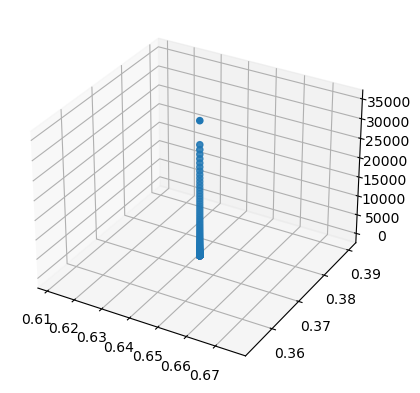

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0], theta_history[:,1], cost_history, zdir="z")
# weight값 에 따라 cost가 변화하는 값 그래프로 생성
plt.show()

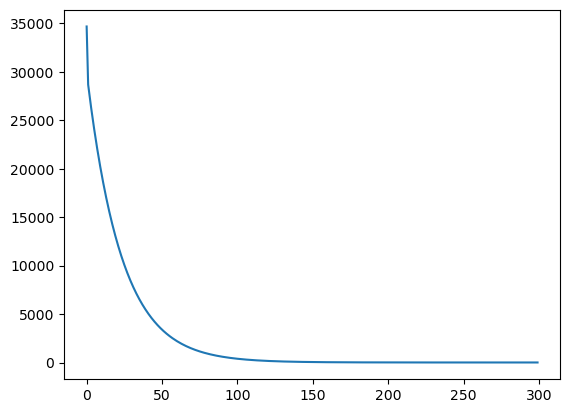

In [17]:
plt.plot(cost_history)
plt.show()